In [1]:

import os
import re
import torch
from torch.utils.data import Dataset
from torchvision import transforms

from vqa_api import VQA
from vqa_dataset import VQADataset

%load_ext autoreload
%autoreload 2

/home/alice/anaconda3/envs/lowergcc/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
# take a look at the vqa api.
data_path = '../../data/'
test_q_path = data_path + 'OpenEnded_mscoco_val2014_questions.json'
test_anno_path = data_path + 'mscoco_val2014_annotations.json'

vqa = VQA(test_anno_path, test_q_path)
cnt = 0

for k, v in vqa.qa.items():
    print(k, vqa.qqa[k]['question'])
    answers = [
        a['answer'] for a in v['answers']
    ]
    print(', '.join(answers))
    cnt += 1
    if cnt > 10: break

    

loading VQA annotations and questions into memory...
creating index...
index created!
3506232 What is the table made of?
wood, wood, wood, wood, wood, wood, wood, wood, wood, wood
3506230 Is the food napping on the table?
no, no, no, no, no, yes, no, no, yes, no
3506231 What has been upcycled to make lights?
kettles, tea kettles, kettle, teapots, tea kettle, kettles, tea kettles, tea kettles, pots used for lights, kettles
86472 Is this an Spanish town?
yes, no, no, no, yes, no, yes, yes, no, no
86470 Are there shadows on the sidewalk?
yes, yes, yes, yes, yes, yes, yes, yes, yes, yes
86471 What is in the top right corner?
tree, tree, tree, tree, tree, tree, tree, tree, tree, tree
4344100 Is it cold outside?
yes, yes, yes, yes, yes, yes, yes, yes, yes, yes
4344101 What is leaning against the house?
ladder, ladder, ladder, ladder, ladder, ladder, ladder, ladder, ladder, ladder
4344102 How many windows can you see?
1, 1, 1, 1, 1, 1, 1, 1, 1, 1
562050 Is this in a park?
yes, yes, yes, yes, 

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [37]:
data_path = '../../data/'
image_dir = data_path + 'val2014'
question_json_file_path = data_path + 'OpenEnded_mscoco_val2014_questions.json'
annotation_json_file_path = data_path + 'mscoco_val2014_annotations.json'
image_filename_pattern = "COCO_val2014_{}.jpg"

dataset = VQADataset(image_dir, question_json_file_path, 
                     annotation_json_file_path, image_filename_pattern)
print(len(dataset))


loading VQA annotations and questions into memory...
creating index...
index created!
121512


Question: Is this a child room?
Answer 1: yes
Answer 2: yes
Answer 3: yes
Answer 4: yes
Answer 5: yes
Answer 6: yes
Answer 7: yes
Answer 8: yes
Answer 9: yes
Answer 10: yes
Question: How many animals are in the picture?
Answer 1: 2
Answer 2: 2
Answer 3: 2
Answer 4: 2
Answer 5: 2
Answer 6: 2
Answer 7: 2
Answer 8: 2
Answer 9: 2
Answer 10: 2
Question: What color is the floor?
Answer 1: brown
Answer 2: brown
Answer 3: brown
Answer 4: brown
Answer 5: brown
Answer 6: brown
Answer 7: wood colored
Answer 8: brown
Answer 9: brown
Answer 10: brown


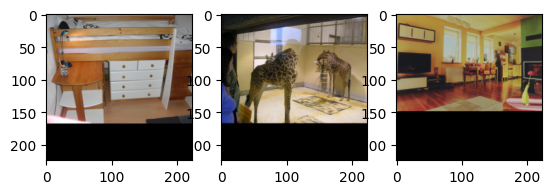

In [36]:

idxs = [11, 12, 15]
for k in range(3):
    itm = dataset[idxs[k]]
    anno=dataset._vqa.load_qa(itm['question']['question_id'])
    dataset._vqa.show_qa(anno)
    plt.subplot(1, 3, 1+k)
    plt.imshow(itm['orig_img'].numpy().transpose(1, 2, 0))
    

In [61]:
# now let us print some pairs onto WANDB
import wandb
wandb.init(project="vqa")



wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


In [74]:
idxs = [11, 12, 15]
tdata = []
for k in range(3):
    itm = dataset[idxs[k]]
    qstr = itm['question']['question']
    anno = dataset._vqa.load_qa(itm['question']['question_id'])
    astr = anno[0]['answers'][0]['answer']
    qastr = f'Q: {qstr} \n A: {astr}'
    npimage = itm['orig_img'].numpy().transpose(1, 2, 0)*255
    npimage = npimage.astype(int)
    tdata.append([ qastr, wandb.Image(npimage) ])
print(tdata)

wandb.log({"vqa_samples", 
           wandb.Table(columns=["QA", "Image"], 
                       data=tdata, allow_mixed_types=True)
    })

[['Q: Is this a child room? \n A: yes', <wandb.sdk.data_types.image.Image object at 0x7f11e16d5640>], ['Q: How many animals are in the picture? \n A: 2', <wandb.sdk.data_types.image.Image object at 0x7f11e11400a0>], ['Q: What color is the floor? \n A: brown', <wandb.sdk.data_types.image.Image object at 0x7f11e11401f0>]]


TypeError: unhashable type: 'Table'